In [2]:
import pandas as pd
import os
import glob
import cv2
import numpy as np
import imgaug.augmenters as iaa
from matplotlib import pyplot as plt
from pathlib import Path

In [190]:
IMG_PATH = '/home/daniel/dev/python/chest_x_ray/data/mooney/val/PNEUMONIA'
IMG_PATH = '/home/8cb7/.kaggle/mooney/chest_xray/val/PNEUMONIA'

def load_imgs(imgpath):
    paths = sorted(list(Path(os.path.join(imgpath)).glob('**/*')))
    loaded_imgs = []
    for p in paths:
        loaded_imgs.append(cv2.imread(str(p), cv2.IMREAD_GRAYSCALE))

    print(len(loaded_imgs))
    print(paths[0:5])
    return loaded_imgs

def plot_img(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [125]:
BASE_MOONEY_DATA_PATH = '/home/8cb7/.kaggle/mooney/chest_xray'
MASKPATH = BASE_MOONEY_DATA_PATH + '/masks/test/PNEUMONIA'

In [158]:
IMGPATH = BASE_MOONEY_DATA_PATH + '/test/PNEUMONIA'

In [50]:
from skimage import morphology

In [191]:
raw = load_imgs(IMGPATH)

390
[PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg')]


In [192]:
masks = load_imgs(MASKPATH)

390
[PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/masks/test/PNEUMONIA/person100_bacteria_475_predmask.jpg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/masks/test/PNEUMONIA/person100_bacteria_477_predmask.jpg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/masks/test/PNEUMONIA/person100_bacteria_478_predmask.jpg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/masks/test/PNEUMONIA/person100_bacteria_479_predmask.jpg'), PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/masks/test/PNEUMONIA/person100_bacteria_480_predmask.jpg')]


In [3]:
imgs = load_imgs(IMG_PATH)
print(type(imgs[0]))

8
<class 'numpy.ndarray'>


In [202]:
maskIndex = 2

In [203]:
mask = masks[maskIndex]

In [204]:
orig = raw[maskIndex]

In [205]:
sorted(list(Path(os.path.join(IMGPATH)).glob('**/*')))[maskIndex]

PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg')

In [206]:
sorted(list(Path(os.path.join(MASKPATH)).glob('**/*')))[maskIndex]

PosixPath('/home/8cb7/.kaggle/mooney/chest_xray/masks/test/PNEUMONIA/person100_bacteria_478_predmask.jpg')

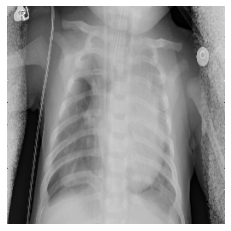

In [207]:
plot_img(cv2.resize(orig, (256,256)))

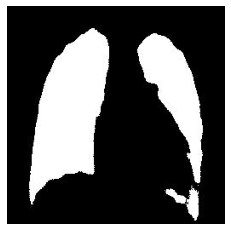

In [208]:
plot_img(mask)

In [198]:
dilation = cv2.dilate(mask,kernel,iterations = 4)

In [199]:
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernelDilate)

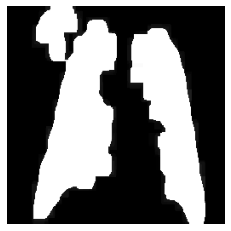

In [200]:
plot_img(closing)

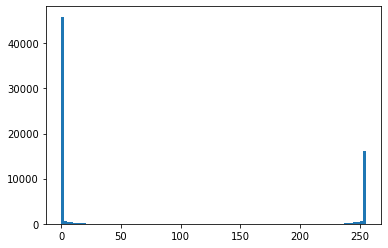

In [234]:
plt.hist(mask.flat, bins=100, range=(0, 255))
plt.show()

In [236]:
np.unique(mask, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  37,  40,  43,  44,
         49,  50,  60,  62,  81,  84,  85,  88,  97, 101, 108, 132, 145,
        159, 162, 166, 181, 190, 196, 197, 200, 204, 215, 219, 223, 224,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255], dtype=uint8),
 array([45452,   219,   200,   188,   180,   164,   160,   142,   123,
          110,    84,    95,    83,    56,    51,    46,    40,    30,
           31,    16,    21,    16,    13,    11,     5,     8,     6,
            2,     5,     2,     2,     3,     2,     1,     2,     3,
            1,     1,     1,     1,     1,     1,     2,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1

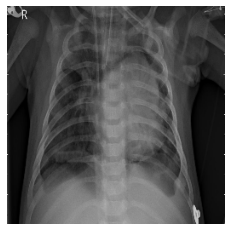

In [201]:
plot_img(cv2.resize(orig, (256,256)))

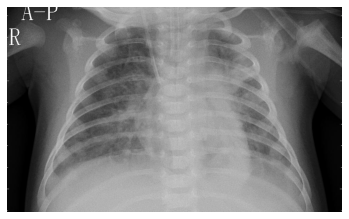

In [119]:
imindex = 3
plot_img(imgs[imindex])


In [120]:
img = imgs[imindex]

In [18]:
equ = cv2.equalizeHist(img)

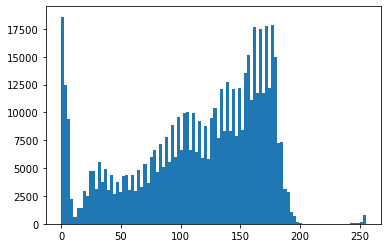

In [16]:
plt.hist(imgs[imindex].flat, bins=100, range=(0, 255))
plt.show()

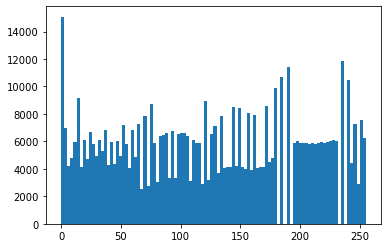

In [19]:
plt.hist(equ.flat, bins=100, range=(0, 255))
plt.show()

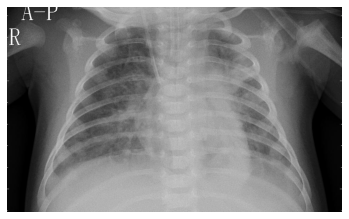

In [21]:
plot_img(img)

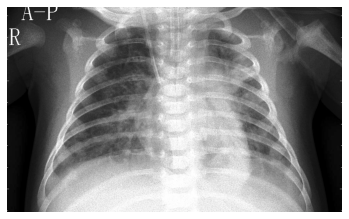

In [20]:
plot_img(equ)

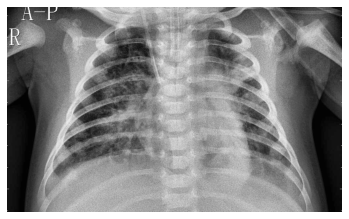

In [22]:
clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)
plot_img(cl_img)

In [211]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.3.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

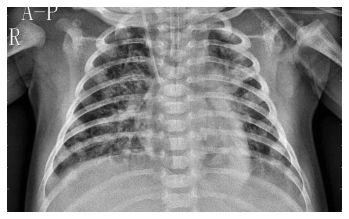

In [225]:
clahe = cv2.createCLAHE(clipLimit = 2.5, tileGridSize=(16,16))
cl_img = clahe.apply(img)
plot_img(cl_img)

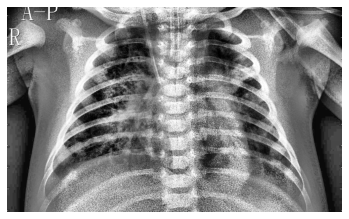

In [209]:
clahe = cv2.createCLAHE(clipLimit = 10.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)
plot_img(cl_img)

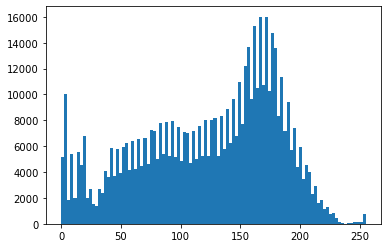

In [25]:
plt.hist(cl_img.flat, bins=100, range=(0, 255))
plt.show()

In [140]:
ret, thresh1 = cv2.threshold(cl_img, 110, 150, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(cl_img, 110, 255, cv2.THRESH_BINARY_INV)

In [228]:
ret, thresh3 = cv2.threshold(cl_img, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [229]:
thresh3

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

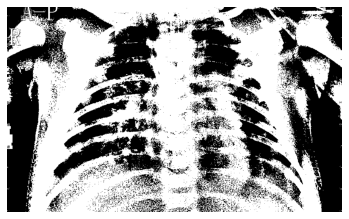

In [141]:
plot_img(thresh1)

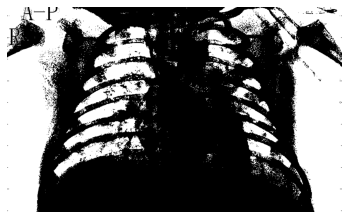

In [230]:
plot_img(thresh3)

In [143]:
# currently not in use
def remove_small_regions(img):
    """Morphologically removes small (less than size) connected regions of 0s or 1s."""
    cleaned = morphology.remove_small_objects(img, min_size=16, connectivity=1)
    #cleaned = morphology.remove_small_holes(img, area_threshold=1)
    return cleaned

In [144]:
import cv2
import numpy as np

kernel = np.ones((4,4),np.uint8)

In [145]:
kernelDilate = np.ones((4,4), np.uint8)

In [146]:
noSmallRegions = remove_small_regions(thresh3)

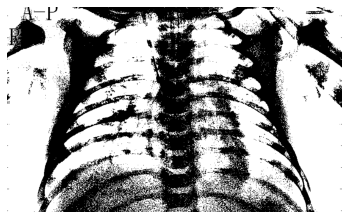

In [147]:
plot_img(noSmallRegions)

In [148]:
closing = cv2.morphologyEx(noSmallRegions, cv2.MORPH_CLOSE, kernelDilate)

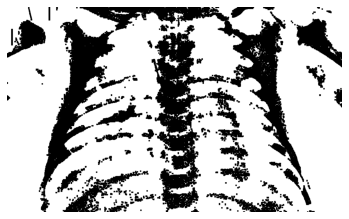

In [149]:
plot_img(closing)

In [150]:
dilation = cv2.dilate(closing,kernel,iterations = 4)

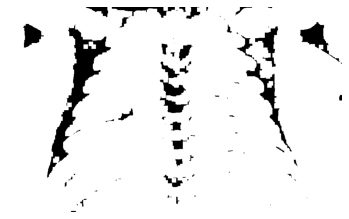

In [151]:
plot_img(dilation)

<ipython-input-59-f44da18449af>:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  cleaned = morphology.remove_small_holes(img, area_threshold=1)


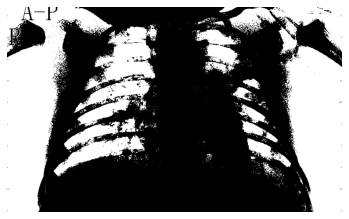

In [60]:
plot_img(remove_small_regions(thresh3))

<ipython-input-59-f44da18449af>:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  cleaned = morphology.remove_small_holes(img, area_threshold=1)


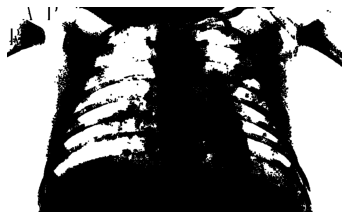

In [76]:
plot_img(remove_small_regions(closing))

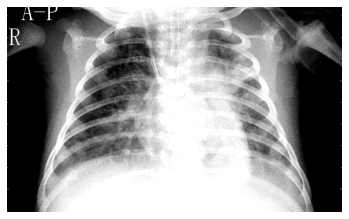

In [26]:
# Calculate mean and STD
mean, STD  = cv2.meanStdDev(imgs[imindex])

# Normalize to range
norm_image = cv2.normalize(imgs[imindex], imgs[imindex], 0, 255, norm_type=cv2.NORM_MINMAX)

# Clip frame to lower and upper STD
offset = 1
clipped = np.clip(norm_image, mean - offset*STD, mean + offset*STD).astype(np.uint8)

test_div = clipped / 255.0

plot_img(test_div)



# norm_image = cv2.normalize(imgs[0], None, alpha=0, beta=255, norm_type=cv2.NORM_L1)

In [6]:
norm_image 

array([[15, 15, 16, ...,  9,  8,  8],
       [15, 15, 16, ..., 12, 12, 13],
       [15, 15, 16, ..., 17, 17, 18],
       ...,
       [ 0,  0, 10, ...,  0,  8,  0],
       [18,  8,  0, ...,  0,  0, 17],
       [ 4, 10, 20, ..., 13,  8,  0]], dtype=uint8)

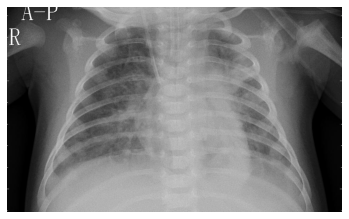

In [7]:
plot_img(norm_image)

In [8]:
# aug_clahe = iaa.CLAHE(clip_limit=(4), tile_grid_size_px=(2,2))
aug_hqeq = iaa.CLAHE(clip_limit=(0.2), tile_grid_size_px=(4,4))

def applyCLAHE(img):
    img = aug_hqeq.augment_image(img)
    return img

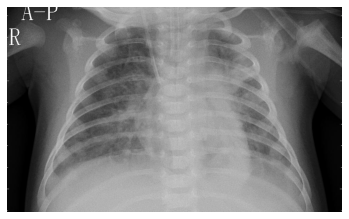

In [9]:
plot_img((imgs[imindex]))

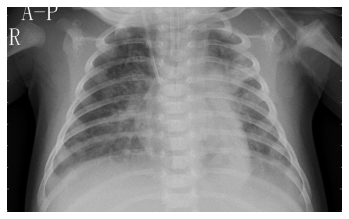

In [10]:
plot_img(applyCLAHE(norm_image))

In [11]:
applyCLAHE(norm_image)

array([[16, 16, 17, ...,  9,  8,  8],
       [16, 16, 17, ..., 12, 12, 13],
       [16, 16, 17, ..., 17, 17, 18],
       ...,
       [ 1,  1, 12, ...,  1,  9,  1],
       [20,  9,  1, ...,  1,  1, 19],
       [ 5, 12, 22, ..., 15,  9,  1]], dtype=uint8)

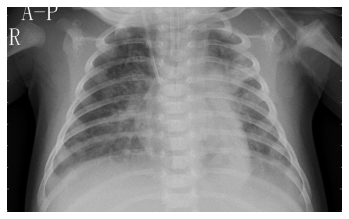

In [12]:
plot_img(applyCLAHE(norm_image))

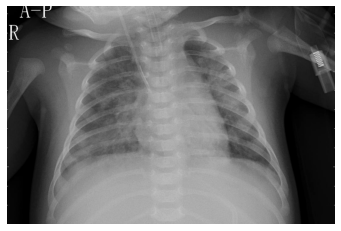

In [13]:
plot_img(applyCLAHE(imgs[2]))

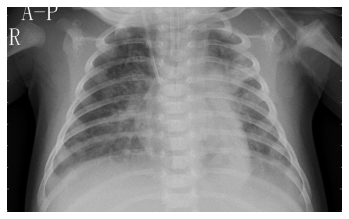

In [14]:
plot_img(applyCLAHE(imgs[3]))
